In [1]:
import pandas as pd
import numpy as np
import sys
import pickle
import glob
import os

In [2]:
import peakutils

In [3]:
NUMBER_OF_RUNS_IN_EXPERIMENT = 20

In [4]:
percolator_df = pd.read_pickle('/Users/darylwilding-mcbride/Downloads/percolator_df.pkl')

In [5]:
percolator_df.columns

Index(['file_idx', 'scan', 'charge_x', 'spectrum precursor m/z',
       'spectrum neutral mass', 'peptide mass', 'percolator score',
       'percolator q-value', 'percolator PEP', 'total matches/spectrum',
       'sequence', 'protein id', 'flanking aa', 'feature_id', 'charge_y',
       'rt_apex', 'scan_apex', 'intensity', 'precursor_id',
       'monoisotopic_mass', 'predicted_mass_error',
       'recalibrated_monoisotopic_mass', 'recalibrated_monoisotopic_mz',
       'percolator_idx', 'batch', 'human'],
      dtype='object')

In [6]:
# find the experiment-average for each sequence-charge
experiment_sequences_l = []
for group_name,group_df in percolator_df.groupby(['sequence','charge_x'], as_index=False):
    sequence = group_name[0]
    charge = group_name[1]
    theoretical_mz = group_df.iloc[0]['spectrum precursor m/z']
    experiment_scan = peakutils.centroid(group_df.scan_apex, group_df.intensity)
    experiment_rt = peakutils.centroid(group_df.rt_apex, group_df.intensity)
    experiment_intensity = group_df.intensity.mean()
    experiment_sequences_l.append((sequence, charge, theoretical_mz, experiment_scan, experiment_rt, experiment_intensity))
    

In [7]:
experiment_sequences_df = pd.DataFrame(experiment_sequences_l, columns=['sequence','charge','theoretical_mz', 'experiment_scan', 'experiment_rt', 'experiment_intensity'])


In [8]:
experiment_sequences_df.head()

,sequence,charge,theoretical_mz,experiment_scan,experiment_rt,experiment_intensity
0,AAAAAAAAAPAAAATAPTTAATTAATAAQ,2,1184.1049,73.911301,602.012681,108754.444444
1,AAAAAAAAAPAAAATAPTTAATTAATAAQ,3,789.7394,335.868469,609.864140,29377.333333
2,AAAAAAAAVPSAGPAGPAPTSAAGR,2,1016.0286,160.291329,489.973155,58456.622222
3,AAAAALSQQQSLQER,2,785.9075,496.361511,375.039574,57092.250000
4,AAAAATVVPPMVGGPPFVGPVGFGPGDR,3,864.1171,707.537580,1039.861047,50988.518519


In [9]:
percolator_df.columns

Index(['file_idx', 'scan', 'charge_x', 'spectrum precursor m/z',
       'spectrum neutral mass', 'peptide mass', 'percolator score',
       'percolator q-value', 'percolator PEP', 'total matches/spectrum',
       'sequence', 'protein id', 'flanking aa', 'feature_id', 'charge_y',
       'rt_apex', 'scan_apex', 'intensity', 'precursor_id',
       'monoisotopic_mass', 'predicted_mass_error',
       'recalibrated_monoisotopic_mass', 'recalibrated_monoisotopic_mz',
       'percolator_idx', 'batch', 'human'],
      dtype='object')

In [50]:
run_sequences_l = []
for group_name,group_df in percolator_df.groupby(['file_idx','sequence','charge_x'], as_index=False):
    file_idx = group_name[0]
    sequence = group_name[1]
    charge = group_name[2]
    run_mz = peakutils.centroid(group_df.recalibrated_monoisotopic_mz, group_df.intensity)
    run_mz_std_dev = np.std(group_df.recalibrated_monoisotopic_mz)
    run_scan = peakutils.centroid(group_df.scan_apex, group_df.intensity)
    run_scan_std_dev = np.std(group_df.scan_apex)
    run_rt = peakutils.centroid(group_df.rt_apex, group_df.intensity)
    run_rt_std_dev = np.std(group_df.rt_apex)
    run_intensity = np.mean(group_df.intensity)
    run_intensity_std_dev = np.std(group_df.intensity)
    run_sequences_l.append((file_idx,sequence,charge,run_mz,run_scan,run_rt,run_mz_std_dev,run_scan_std_dev,run_rt_std_dev,run_intensity,run_intensity_std_dev))

In [51]:
run_sequences_df = pd.DataFrame(run_sequences_l, columns=['file_idx','sequence','charge','run_mz','run_scan','run_rt','run_mz_std_dev','run_scan_std_dev','run_rt_std_dev','run_intensity','run_intensity_std_dev'])


In [52]:
run_sequences_df.head()

,file_idx,sequence,charge,run_mz,run_scan,run_rt,run_mz_std_dev,run_scan_std_dev,run_rt_std_dev,run_intensity,run_intensity_std_dev
0,0,AAAAAAAAAPAAAATAPTTAATTAATAAQ,2,1184.608424,74.065131,601.582008,0.000263,0.465000,0.065000,146908.000000,15838.0000
1,0,AAAAAAAAVPSAGPAGPAPTSAAGR,2,1016.532311,156.625361,486.692475,0.000087,2.523085,0.028284,53127.666667,4860.1922
2,0,AAAAAWEEPSSGNGTAR,2,823.382064,535.310000,367.240000,0.000000,0.000000,0.000000,258410.000000,0.0000
3,0,AAAAPVTGPLADDPIQETITFDDFAK,3,892.112987,468.100000,997.180000,0.000000,0.000000,0.000000,203979.000000,0.0000
4,0,AAAEDVNVTFEDQQK,2,832.891998,485.630000,471.790000,0.000000,0.000000,0.000000,74963.000000,0.0000


In [41]:
import matplotlib.pyplot as plt

In [76]:
cv_mz = run_sequences_df.run_mz_std_dev / run_sequences_df.run_mz

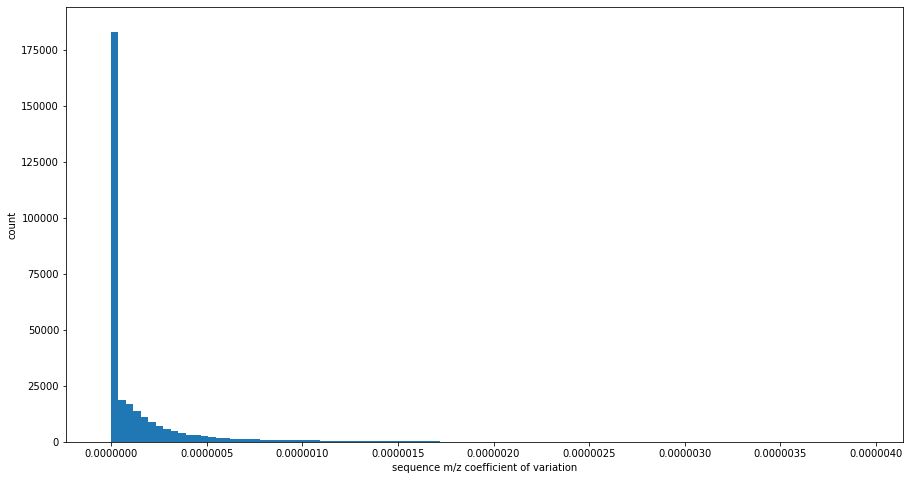

In [77]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 100
hist, bins, _ = plt.hist(cv_mz, bins=bins)
plt.xlabel('sequence m/z coefficient of variation')
plt.ylabel('count')

plt.show()

In [74]:
cv_scan = run_sequences_df.run_scan_std_dev / run_sequences_df.run_scan

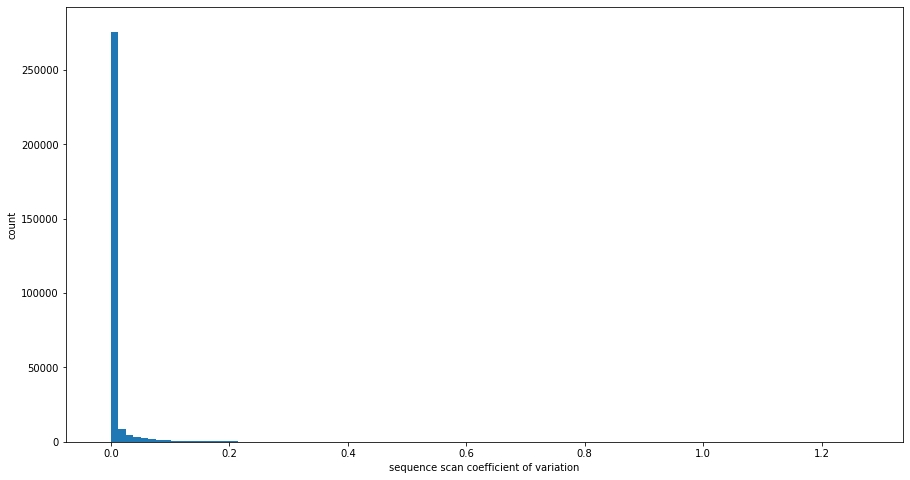

In [75]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 100
hist, bins, _ = plt.hist(cv_scan, bins=bins)
plt.xlabel('sequence scan coefficient of variation')
plt.ylabel('count')

plt.show()

In [70]:
cv_rt = run_sequences_df.run_rt_std_dev / run_sequences_df.run_rt

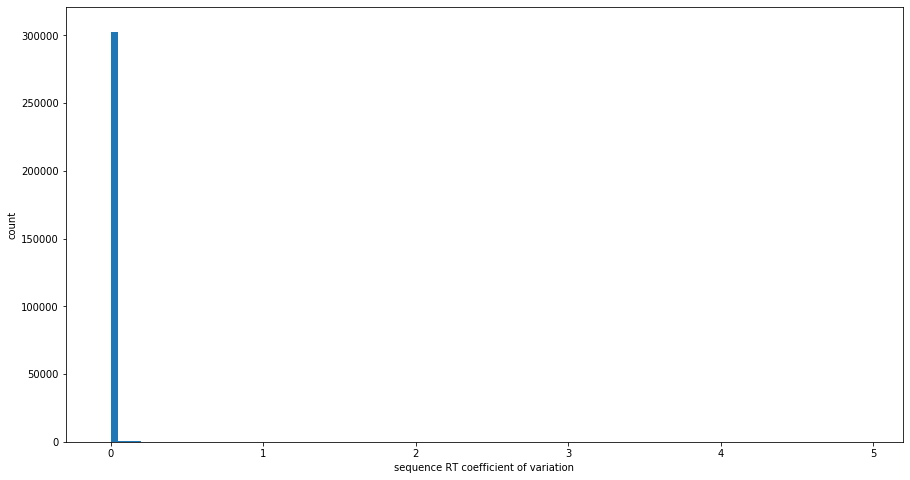

In [71]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 100
hist, bins, _ = plt.hist(cv_rt, bins=bins, label='m/z delta')
plt.xlabel('sequence RT coefficient of variation')
plt.ylabel('count')

plt.show()

In [72]:
cv_intensity = run_sequences_df.run_intensity_std_dev / run_sequences_df.run_intensity

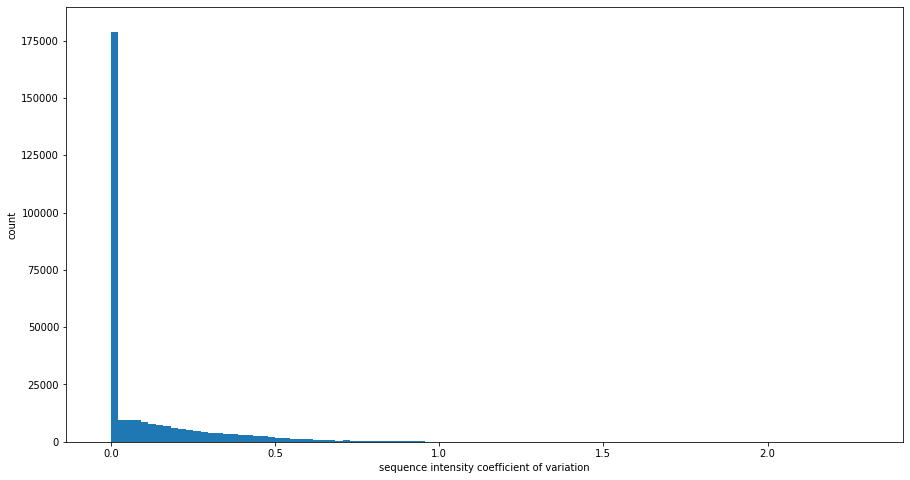

In [73]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 100
hist, bins, _ = plt.hist(cv_intensity, bins=bins)
plt.xlabel('sequence intensity coefficient of variation')
plt.ylabel('count')

plt.show()

In [30]:
merged_df = pd.merge(run_sequences_df, experiment_sequences_df, how='left', left_on=['sequence','charge'], right_on=['sequence','charge'])

In [31]:
merged_df['delta_mz'] = merged_df.theoretical_mz - merged_df.run_mz
merged_df['delta_scan'] = merged_df.experiment_scan - merged_df.run_scan
merged_df['delta_rt'] = merged_df.experiment_rt - merged_df.run_rt

In [32]:
merged_df.head()

,file_idx,sequence,charge,run_mz,run_scan,run_rt,theoretical_mz,experiment_scan,experiment_rt,experiment_intensity,delta_mz,delta_scan,delta_rt
0,0,AAAAAAAAAPAAAATAPTTAATTAATAAQ,2,1184.608424,74.065131,601.582008,1184.1049,73.911301,602.012681,108754.444444,-0.503524,-0.153831,0.430673
1,0,AAAAAAAAVPSAGPAGPAPTSAAGR,2,1016.532311,156.625361,486.692475,1016.0286,160.291329,489.973155,58456.622222,-0.503711,3.665967,3.280680
2,0,AAAAAWEEPSSGNGTAR,2,823.382064,535.310000,367.240000,822.8783,533.861853,371.271659,277023.690476,-0.503764,-1.448147,4.031659
3,0,AAAAPVTGPLADDPIQETITFDDFAK,3,892.112987,468.100000,997.180000,891.7775,465.668232,997.391366,150202.950000,-0.335487,-2.431768,0.211366
4,0,AAAEDVNVTFEDQQK,2,832.891998,485.630000,471.790000,832.3878,487.082550,475.841292,116982.693430,-0.504198,1.452550,4.051292


In [33]:
np.abs(merged_df.delta_mz).max()

1.010614427598739

In [34]:
merged_df.to_pickle('/Users/darylwilding-mcbride/Downloads/experiments/190719_Hela_Ecoli/training-sets/merged_df.pkl')

Generate the training sets for each run

In [ ]:
mapping_df = pd.read_pickle('/Users/darylwilding-mcbride/Downloads/percolator_mapping_df.pkl')

In [ ]:
TRAINING_SET_DIR = '/Users/darylwilding-mcbride/Downloads/experiments/190719_Hela_Ecoli/training-sets'

In [ ]:
for file_idx in range(NUMBER_OF_RUNS_IN_EXPERIMENT):
    X_df = merged_df[merged_df.file_idx == file_idx][['theoretical_mz','experiment_average_scan','experiment_average_rt']]
    y_df = merged_df[merged_df.file_idx == file_idx][['run_average_mz','run_average_scan','run_average_rt']]
    run_name = mapping_df[mapping_df.file_idx == file_idx].run_name.iloc[0]
    training_set_file_name_X = "{}/X_df-file-{}-{}.pkl".format(TRAINING_SET_DIR, file_idx, run_name)
    X_df.to_pickle(training_set_file_name_X)
    training_set_file_name_y = "{}/y_df-file-{}-{}.pkl".format(TRAINING_SET_DIR, file_idx, run_name)
    y_df.to_pickle(training_set_file_name_y)

Extract the training set for file_idx = 0

In [ ]:
X_df = merged_df[merged_df.file_idx == 0][['theoretical_mz','experiment_average_scan','experiment_average_rt']]
y_df = merged_df[merged_df.file_idx == 0][['run_average_mz','run_average_scan','run_average_rt']]

In [ ]:
X = X_df.values
y = y_df.values

In [ ]:
from sklearn import preprocessing

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

In [ ]:
X_scaled = min_max_scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X_scaled, y, test_size=0.3)

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

In [ ]:
import keras
from keras.models import Model
from keras.layers import Input, Dense

In [ ]:
keras.backend.clear_session()

In [ ]:
inputs = Input(shape=(3,), dtype='float32', name='main_input')

In [ ]:
x = Dense(32, activation='relu')(inputs)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(32, activation='relu')(x)
predictions = Dense(3, activation='sigmoid')(x)

In [ ]:
model = Model(inputs=inputs, outputs=predictions)

In [ ]:
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train,
          batch_size=8, epochs=200,
          validation_data=(X_val, y_val))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
model.evaluate(X_test, y_test)[1]

In [ ]:
model.predict(X_train)

In [ ]:
X_train

In [ ]:
model.predict_on_batch(X_test)